
# **<h3 align="center"> Capstone Project</h3>**
## **<h3 align="center">Books - Metadata</h3>**
**Group members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>

## Introduction
This notebooks will serve to the chat to have a database about the books. If the user want's to know, by description the name of the book, the chat will be capable of recognize. Also, if the user wants to know more information about a certain book, like the release year, the publisher and so on, the chat will be also capable of giving those information.

-----------------------------
## Imports

In [43]:
import pandas as pd

----------------------------
## Loading the datasets
Now it is time to, through a function, open the csv files. Inside the archive we have different datasets divided by genre. Since our goal is to have a more complete dataset we will join this datasets. All the datasets were provided by Kaggle:
- preproc_books - https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset (Retrieved at 20 november)
- books_data and books_rating - https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews?select=books_data.csv (Retrieved at 20 november)


In [44]:
preproc_books = pd.read_csv(r'Data/Book_files/Preprocessed_data.csv')
books_data = pd.read_csv(r'Data/Book_files/archive/books_data.csv')
# books_rating = pd.read_csv(r'Data/Book_files/archive/Books_rating.csv')

In [45]:
preproc_books.head(3)

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada


In [46]:
books_data.head(3)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN


There are somethings we migth solve by checking the  dataset as:
- treat the NaN values
- delete link features
- change the names

-------------------------------------
## Preproc Books -  Preprocessing

In [47]:
preproc_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031174 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1031175 non-null  object 
 15

Using info() we see that we have some missing values, so we will delete them.

In [48]:
print("\nDataFrame before:")
print(preproc_books.shape)

preproc_books.dropna(inplace=True)

print("\nDataFrame after dropping NaN values:")
print(preproc_books.shape)



DataFrame before:
(1031175, 19)

DataFrame after dropping NaN values:
(982278, 19)


There are some columns that we need to change their names and also delete unnwanted features for the metadata.

In [49]:
# Renaming columns
preproc_books.rename(columns={
    'book_title': 'title',
    'book_author': 'authors',
    'Summary': 'description',
    'Category':'categories'
    }, inplace=True)

columns_to_drop = ['Unnamed: 0', 'user_id', 'location', 'img_s', 'img_m', 'img_l', 'age','city','state']
preproc_books.drop(columns=columns_to_drop, inplace=True)

print("\nDataFrame after dropping specified columns:")
preproc_books.head(2)


DataFrame after dropping specified columns:


,isbn,rating,title,authors,year_of_publication,publisher,description,Language,categories,country
0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],usa
1,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],canada


In [50]:
# Assuming 'preproc_books' is your DataFrame and 'isbn' is the column containing ISBN values

# Remove duplicates based on 'isbn' and keep the first occurrence
preproc_books = preproc_books.drop_duplicates(subset='isbn', keep='first')

# Display the DataFrame after removing duplicates
preproc_books.head(10)


,isbn,rating,title,authors,year_of_publication,publisher,description,Language,categories,country
0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,Provides an introduction to classical myths pl...,en,['Social Science'],usa
1,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],canada
15,0060973129,0,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,"Here, for the first time in paperback, is an o...",en,['1940-1949'],canada
18,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,"Describes the great flu epidemic of 1918, an o...",en,['Medical'],canada
29,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton & Company,A look at the incredibly well-preserved ancien...,en,['Design'],canada
30,0399135782,0,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,A Chinese immigrant who is convinced she is dy...,en,['Fiction'],canada
63,0425176428,0,What If?: The World's Foremost Military Histor...,Robert Cowley,2000.0,Berkley Publishing Group,"Essays by respected military historians, inclu...",en,['History'],canada
68,0671870432,0,PLEADING GUILTY,Scott Turow,1993.0,Audioworks,9,9,9,canada
71,0679425608,0,Under the Black Flag: The Romance and the Real...,David Cordingly,1996.0,Random House,"An authoritative, revisionist history of the g...",en,['Fiction'],canada
72,074322678X,5,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,"Now back in print, Ann Beattie&#39;s finest sh...",en,['Fiction'],canada


As we can see there are some 9 values, as we have a lot of data and it is not important for us to have so many values, we will delete this rows.

In [51]:
# Display the shape before deletion
print("Shape before deletion:", preproc_books.shape)

# Remove rows where both 'language' and 'description' are equal to 9
preproc_books = preproc_books[
    ~(
        (preproc_books['Language'] == '9') |
        (preproc_books['description'] == '9') |
        (preproc_books['categories'] == '9')
    )
]

# Display the shape after deletion
print("Shape after deletion:", preproc_books.shape)


Shape before deletion: (264661, 10)


Shape after deletion: (136226, 10)


Now we can advance to the next preprocessing.

-------------------------------------
## Books Data -  Preprocessing

In [52]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [53]:
print("\nDataFrame before:")
print(books_data.shape)

books_data.dropna(inplace=True)

print("\nDataFrame after dropping NaN values:")
print(books_data.shape)


DataFrame before:
(212404, 10)

DataFrame after dropping NaN values:
(40635, 10)


As in the previous dataset, we have year_of_publication, so through feature _publishedDate_ we will extract the year.

In [54]:

# Extracting year and creating a new column 'year_of_publication'
books_data['year_of_publication'] = books_data['publishedDate'].str.split('-').str[0]
# Displaying the DataFrame with the new column
books_data.head(2)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,year_of_publication
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,1996
31,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],http://books.google.com/books/content?id=IjTAB...,http://books.google.nl/books?id=IjTABgAAQBAJ&p...,Book Publishing Company,2012-08-21,https://play.google.com/store/books/details?id...,['Biography & Autobiography'],1.0,2012


In [55]:
books_data.head(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,year_of_publication
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0,1996
31,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],http://books.google.com/books/content?id=IjTAB...,http://books.google.nl/books?id=IjTABgAAQBAJ&p...,Book Publishing Company,2012-08-21,https://play.google.com/store/books/details?id...,['Biography & Autobiography'],1.0,2012
33,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,['Stefan Draminski'],http://books.google.com/books/content?id=nxttD...,http://books.google.nl/books?id=nxttDwAAQBAJ&p...,Bloomsbury Publishing,2018-09-20,https://play.google.com/store/books/details?id...,['History'],1.0,2018
42,Tess and the Highlander,"In 1543, on a windswept isle off of Scotland, ...",['May Mcgoldrick'],http://books.google.com/books/content?id=VmCRS...,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,Harper Collins,2002-11,http://books.google.nl/books?id=VmCRSPmY3WkC&d...,['Juvenile Fiction'],2.0,2002
43,Beginner's Yoruba (Hippocrene Beginner's Series),"""Beginner's Yoruba"" is now available with two ...",['Kayode J. Fakinlede'],http://books.google.com/books/content?id=xLe4n...,http://books.google.nl/books?id=xLe4nWzeSw0C&p...,Hippocrene Books,2005,http://books.google.nl/books?id=xLe4nWzeSw0C&d...,['Foreign Language Study'],1.0,2005
45,King James: Believe the Hype---The LeBron Jame...,LeBron James is a six-foot-eight gift from the...,['Ryan Jones'],http://books.google.com/books/content?id=hlGqe...,http://books.google.nl/books?id=hlGqehyJhywC&p...,St. Martin's Griffin,2003-10-10,https://play.google.com/store/books/details?id...,['Sports & Recreation'],1.0,2003
47,Building the timber frame house: The revival o...,"For centuries, post-and-beam construction has ...",['Tedd Benson'],http://books.google.com/books/content?id=6uxXo...,http://books.google.nl/books?id=6uxXorE4r-UC&p...,Simon and Schuster,1981-09-01,https://play.google.com/store/books/details?id...,['Architecture'],1.0,1981
54,"Open marriage;: A new life style for couples,",Advocates the importance of individuality in b...,"[""Nena O'Neill"", ""George O'Neill""]",http://books.google.com/books/content?id=xY2SD...,http://books.google.nl/books?id=xY2SD7v3070C&p...,Rowman & Littlefield,1984,http://books.google.nl/books?id=xY2SD7v3070C&d...,['Family & Relationships'],1.0,1984
58,No place to cry: The hurt and healing of sexua...,Just as God gave Dorie Van Stone a tender hear...,"['Dorie N. Van Stone', 'Erwin W. Lutzer']",http://books.google.com/books/content?id=J9NKU...,http://books.google.nl/books?id=J9NKUAfjGU8C&p...,Moody Publishers,1992-05-09,https://play.google.com/store/books/details?id...,['Religion'],4.0,1992
64,The Impatient Gardener's Lawn Book,"Explains how to grow a green, beautiful lawn a...",['Jerry Baker'],http://books.google.com/books/content?id=h-R4N...,http://books.google.nl/books?id=h-R4Nt0spJUC&d...,"Random House Digital, Inc.",1987,http://books.google.nl/books?id=h-R4Nt0spJUC&d...,['Gardening'],1.0,1987


Now let's change some variables names and drop unnecessary columns

In [56]:
# Renaming columns
books_data.rename(columns={
    'Title': 'title',
    'book_author': 'author',
    'Summary': 'description'
    }, inplace=True)

columns_to_drop = ['image', 'previewLink', 'publishedDate', 'infoLink']
books_data.drop(columns=columns_to_drop, inplace=True)

print("\nDataFrame after dropping specified columns:")
books_data.head(2)


DataFrame after dropping specified columns:


,title,description,authors,publisher,categories,ratingsCount,year_of_publication
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,['Religion'],5.0,1996
31,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],Book Publishing Company,['Biography & Autobiography'],1.0,2012


---------------------------------------
## Merging the Datasets
Now that we did the separated the preprocessing, we will merge by title.

In [57]:
final_books= pd.concat([preproc_books, books_data])
merged_data_books = final_books.groupby('title').agg(lambda x: x.dropna().unique().tolist()).reset_index()
merged_data_books.head()

,title,isbn,rating,authors,year_of_publication,publisher,description,Language,categories,country,ratingsCount
0,A Light in the Storm: The Civil War Diary of ...,[0590567330],[0.0],[Karen Hesse],[1999.0],[Hyperion Books for Children],[Captures the emotions of a young Union girl w...,[en],[['Juvenile Fiction']],[usa],[]
1,"Ask Lily (Young Women of Faith: Lily Series, ...",[0310232546],[8.0],[Nancy N. Rue],[2001.0],[Zonderkidz],"[When Lily enters the seventh grade, she start...",[en],[['Juvenile Fiction']],[usa],[]
2,Beyond IBM: Leadership Marketing and Finance ...,[0962295701],[0.0],[Lou Mobley],[1989.0],"[Teleonet, Incorporated]",[Some of the world&#39;s most successful entre...,[en],[['Business & Economics']],[usa],[]
3,Clifford Visita El Hospital (Clifford El Gran...,[0439188970],[0.0],[Norman Bridwell],[2000.0],[Scholastic],[Clifford acompa a a Emily Elizabeth a visitar...,[es],[['Juvenile Fiction']],[usa],[]
4,Dark Justice,[0399151788],[10.0],[Jack Higgins],[2004.0],[Putnam Publishing Group],[An attempt on the life of the U.S. president ...,[en],[['Fiction']],[usa],[]


Set the empty columns into zero

In [58]:
# Loop through all columns and replace empty lists with zeros
for col in merged_data_books.columns:
    merged_data_books[col] = merged_data_books[col].apply(lambda x: 0 if isinstance(x, list) and len(x) == 0 else x)

In [59]:
merged_data_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161759 entries, 0 to 161758
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   title                161759 non-null  object
 1   isbn                 161759 non-null  object
 2   rating               161759 non-null  object
 3   authors              161759 non-null  object
 4   year_of_publication  161759 non-null  object
 5   publisher            161759 non-null  object
 6   description          161759 non-null  object
 7   Language             161759 non-null  object
 8   categories           161759 non-null  object
 9   country              161759 non-null  object
 10  ratingsCount         161759 non-null  object
dtypes: object(11)
memory usage: 13.6+ MB


In [67]:
# Explode the 'categories' column to unlist the inner lists
merged_data_books = merged_data_books.explode('categories')
merged_data_books['categories'] = merged_data_books['categories'].replace(r"'", '', regex=True)

# Visualize the 'categories' column after exploding
print(final_books['categories'])

0           [Social Science]
1                [Actresses]
15               [1940-1949]
18                 [Medical]
29                  [Design]
                 ...        
212374    [Health & Fitness]
212392            [Adultery]
212394             [Fiction]
212399    [Juvenile Fiction]
212402             [Fiction]
Name: categories, Length: 176861, dtype: object


In [61]:
merged_data_books.head(3)

,title,isbn,rating,authors,year_of_publication,publisher,description,Language,categories,country,ratingsCount
0,A Light in the Storm: The Civil War Diary of ...,[0590567330],[0.0],[Karen Hesse],[1999.0],[Hyperion Books for Children],[Captures the emotions of a young Union girl w...,[en],[['Juvenile Fiction']],[usa],0
1,"Ask Lily (Young Women of Faith: Lily Series, ...",[0310232546],[8.0],[Nancy N. Rue],[2001.0],[Zonderkidz],"[When Lily enters the seventh grade, she start...",[en],[['Juvenile Fiction']],[usa],0
2,Beyond IBM: Leadership Marketing and Finance ...,[0962295701],[0.0],[Lou Mobley],[1989.0],"[Teleonet, Incorporated]",[Some of the world&#39;s most successful entre...,[en],[['Business & Economics']],[usa],0


In [68]:
merged_data_books['description'] = merged_data_books['description'].str.replace('&#39;', "'", regex=False)

As we did for the other notebooks we will define a threshold using the categories.

In [69]:
# Combine all categories into a single string and split them
all_categories = ','.join(merged_data_books['categories'].explode().dropna())
split_categories = [category.strip() for category in all_categories.split(',')]

# Create a Series and get the value counts for each category
category_counts = pd.Series(split_categories).value_counts()

# Print the total number of unique categories
total_unique_categories = len(category_counts)
print("Total unique categories:", total_unique_categories)

Total unique categories: 6946


We have a lot of categories, by the output above, so we will the top 20. For this we will plot the percentage of these categories in the whole dataset.

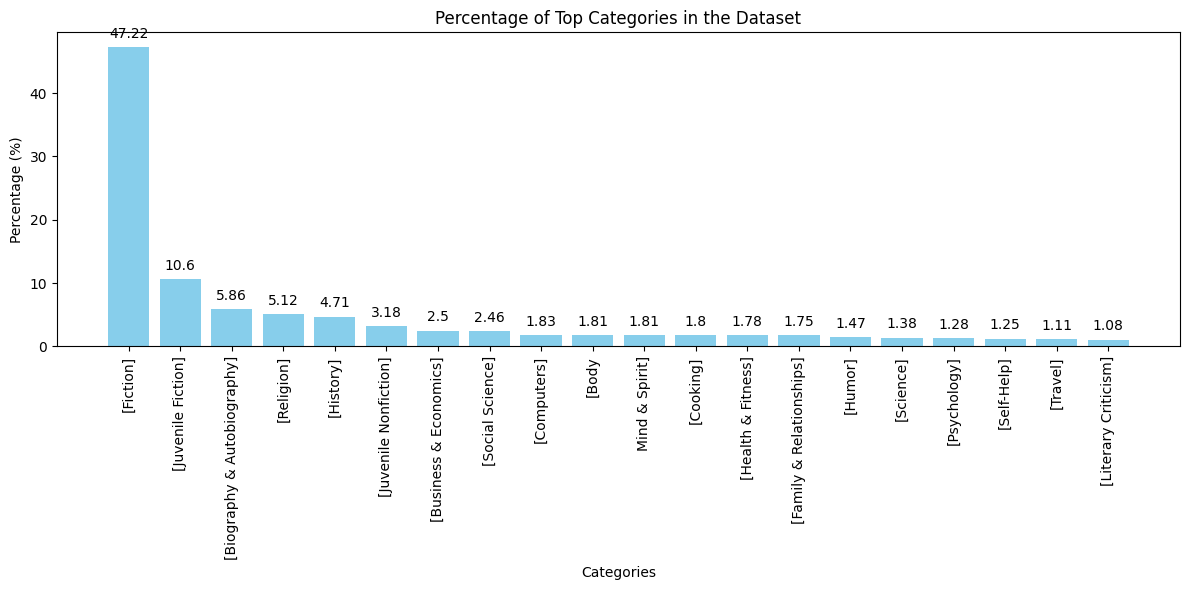

In [70]:
# Select the top N categories to visualize (e.g., top 10)
top_categories = category_counts.head(20)

# Calculate the percentage of each top category
category_percentages = (top_categories / top_categories.sum()) * 100

# Sort categories by count in descending order
sorted_categories = category_percentages.sort_values(ascending=False)

# Create bar chart for individual category distribution with numbers above bars
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_categories.index, sorted_categories, color='skyblue')
plt.title('Percentage of Top Categories in the Dataset')
plt.xlabel('Categories')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)

# Add text labels for each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [71]:
# Get the list of top categories
selected_categories = sorted_categories.index.tolist()

# Filter the DataFrame based on the selected categories
filtered_books = merged_data_books[merged_data_books['categories'].apply(lambda x: any(cat in x for cat in selected_categories))]


In [72]:
filtered_books

,title,isbn,rating,authors,year_of_publication,publisher,description,Language,categories,country,ratingsCount
0,A Light in the Storm: The Civil War Diary of ...,[0590567330],[0.0],[Karen Hesse],[1999.0],[Hyperion Books for Children],NaN,[en],[Juvenile Fiction],[usa],0
1,"Ask Lily (Young Women of Faith: Lily Series, ...",[0310232546],[8.0],[Nancy N. Rue],[2001.0],[Zonderkidz],NaN,[en],[Juvenile Fiction],[usa],0
2,Beyond IBM: Leadership Marketing and Finance ...,[0962295701],[0.0],[Lou Mobley],[1989.0],"[Teleonet, Incorporated]",NaN,[en],[Business & Economics],[usa],0
3,Clifford Visita El Hospital (Clifford El Gran...,[0439188970],[0.0],[Norman Bridwell],[2000.0],[Scholastic],NaN,[es],[Juvenile Fiction],[usa],0
4,Dark Justice,[0399151788],[10.0],[Jack Higgins],[2004.0],[Putnam Publishing Group],NaN,[en],[Fiction],[usa],0
...,...,...,...,...,...,...,...,...,...,...,...
161751,"Â¡Corre, perro, corre!",[1880507021],[0.0],[Philip D. Eastman],[1992.0],[Lectorum Publications],NaN,[en],[Juvenile Fiction],[usa],0
161752,Â¡No bajes al sÃ³tano! (EscalofrÃ­os No. 2),[0590502123],[0.0],[R. L. Stine],[1996.0],[Scholastic],NaN,[en],[Juvenile Fiction],[spain],0
161753,Â¿Eres tu mi mamÃ¡?/Are You My Mother?,[0394815963],[9.0],[Philip D. Eastman],[1967.0],[Random House Books for Young Readers],NaN,[es],[Juvenile Fiction],[usa],0
161754,"Â¿QuÃ© me quieres, amor?",[8495501104],[6.0],[Manuel Rivas],[2001.0],[Santillana USA Publishing Company],NaN,[es],[Fiction],[spain],0


In [73]:
# Check unique categories in the filtered DataFrame
unique_categories_filtered = filtered_books.explode('categories')['categories'].unique()

print("Unique categories in filtered DataFrame:", len(unique_categories_filtered))
print(unique_categories_filtered)


Unique categories in filtered DataFrame: 35
['[Juvenile Fiction]' '[Business & Economics]' '[Fiction]' '[Humor]'
 '[History]' '[Religion]' '[Computers]' '[Juvenile Nonfiction]'
 '[Family & Relationships]' '[Biography & Autobiography]' '[Self-Help]'
 '[Psychology]' '[Travel]' '[Literary Criticism]' '[Social Science]'
 '[Cooking]' '[Health & Fitness]' '[Body, Mind & Spirit]' '[Science]'
 '[Bodybuilders]' '[Body, Human]' '[Bodyguards]' '[Body size]'
 '[Body piercing]' '[Body, Human Religious aspects Protestant churches]'
 '[Body image in women]' '[Body language]' '[Body language.]'
 '[Body weight]' '[Body composition]' '[Bodybuilding]'
 '[Body image in girls]' '[Body snatching]' '[Body size.]' '[Body image]']
